# Context
Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

# Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

# Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below

#### Data Dictionary
    
    brand_name: Name of manufacturing brand
    os: OS on which the device runs
    screen_size: Size of the screen in cm
    4g: Whether 4G is available or not
    5g: Whether 5G is available or not
    main_camera_mp: Resolution of the rear camera in megapixels
    selfie_camera_mp: Resolution of the front camera in megapixels
    int_memory: Amount of internal memory (ROM) in GB
    ram: Amount of RAM in GB
    battery: Energy capacity of the device battery in mAh
    weight: Weight of the device in grams
    release_year: Year when the device model was released
    days_used: Number of days the used/refurbished device has been used
    new_price: Price of a new device of the same model in euros
    used_price: Price of the used/refurbished device in euros


# Loading libraries and data

In [1]:
pip install nb_black

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [3]:
# importing and changing directory
import os

os.chdir("D:\Python")
os.getcwd()

'D:\\Python'

<IPython.core.display.Javascript object>

In [4]:
# loading data
used_device_data = pd.read_csv("used_device_data.csv")

# creating copy of data
df = used_device_data.copy()

<IPython.core.display.Javascript object>

In [5]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 3454 rows and 15 columns.


<IPython.core.display.Javascript object>

In [6]:
# viewing a sample of the data
df.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,179.61,56.76
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,48.65,16.45
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,88.88,79.10
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,281.30,107.54
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,200.42,91.62
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,279.87,104.13
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,69.71,43.14
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,330.24,83.33
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,420.17,142.51
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,131.50,68.57


<IPython.core.display.Javascript object>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


<IPython.core.display.Javascript object>

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# checking for missing values
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# looking at how many missing values per row
df.isnull().sum(axis=1).value_counts()

0    3253
1     200
2       1
dtype: int64

<IPython.core.display.Javascript object>

There are now duplicate records so that is good. We do have a fair amount of missing values, mostly from the main_camera_mp so this will need to be resolved. The other missing values are very low so we can likely drop them or impute the values later.

# Exploratory Data Analysis (EDA)

#### Questions:

   1. What does the distribution of used device prices look like?
   2. What percentage of the used device market is dominated by Android devices?
   3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
   4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
   5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
   6. Budget devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget devices offering greater than 8MP selfie cameras across brands?
   7. Which attributes are highly correlated with the price of a used device?


In [11]:
# checking the summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.08,12.7000,12.830,15.340,30.71
main_camera_mp,3275.0,9.460208,4.815461,0.08,5.0000,8.000,13.000,48.00
selfie_camera_mp,3452.0,6.554229,6.970372,0.00,2.0000,5.000,8.000,32.00
int_memory,3450.0,54.573099,84.972371,0.01,16.0000,32.000,64.000,1024.00
ram,3450.0,4.036122,1.365105,0.02,4.0000,4.000,4.000,12.00
battery,3448.0,3133.402697,1299.682844,500.00,2100.0000,3000.000,4000.000,9720.00
weight,3447.0,182.751871,88.413228,69.00,142.0000,160.000,185.000,855.00
release_year,3454.0,2015.965258,2.298455,2013.00,2014.0000,2015.500,2018.000,2020.00
days_used,3454.0,674.869716,248.580166,91.00,533.5000,690.500,868.750,1094.00
new_price,3454.0,237.038848,194.302782,18.20,120.3425,189.785,291.115,2560.20


<IPython.core.display.Javascript object>

## Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale
# we are using this plot for our non-categorical variables
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

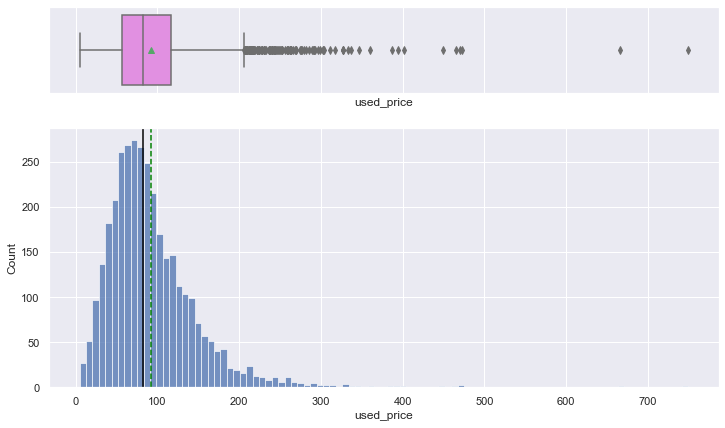

<IPython.core.display.Javascript object>

In [13]:
# used_price
histogram_boxplot(df, "used_price")

In [14]:
# creating log of variable to deal with skewness
df["used_price_log"] = np.log(df["used_price"])

<IPython.core.display.Javascript object>

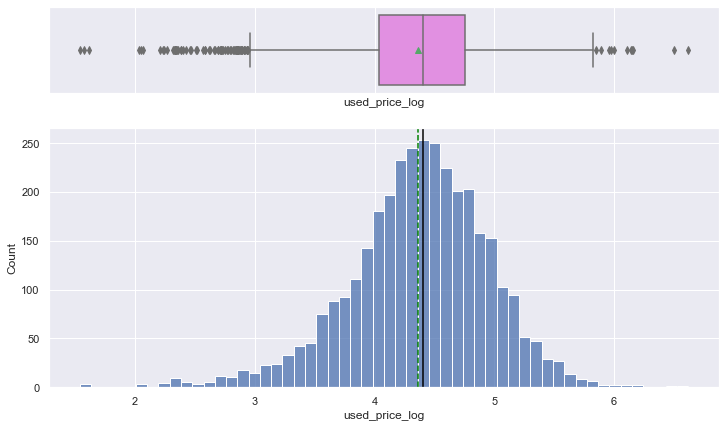

<IPython.core.display.Javascript object>

In [114]:
# used_price_log
histogram_boxplot(df, "used_price_log")

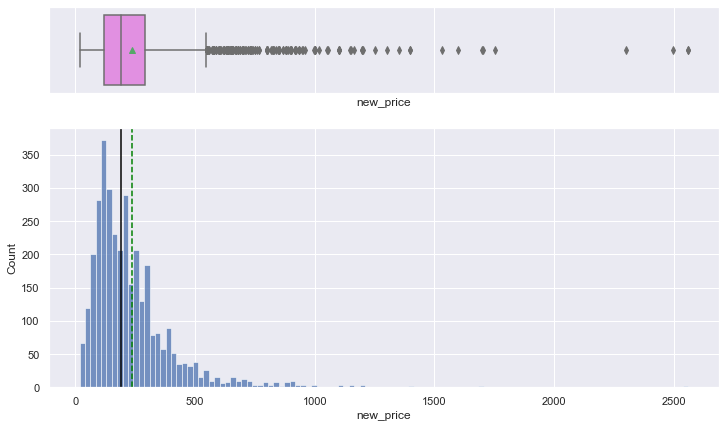

<IPython.core.display.Javascript object>

In [17]:
# new_price
histogram_boxplot(df, "new_price")

In [18]:
# using log to deal with skewness
df["new_price_log"] = np.log(df["new_price"])

<IPython.core.display.Javascript object>

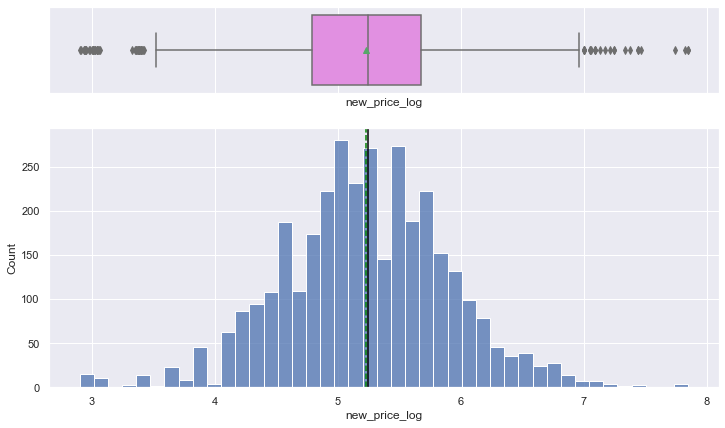

<IPython.core.display.Javascript object>

In [19]:
# new_price_log
histogram_boxplot(df, "new_price_log")

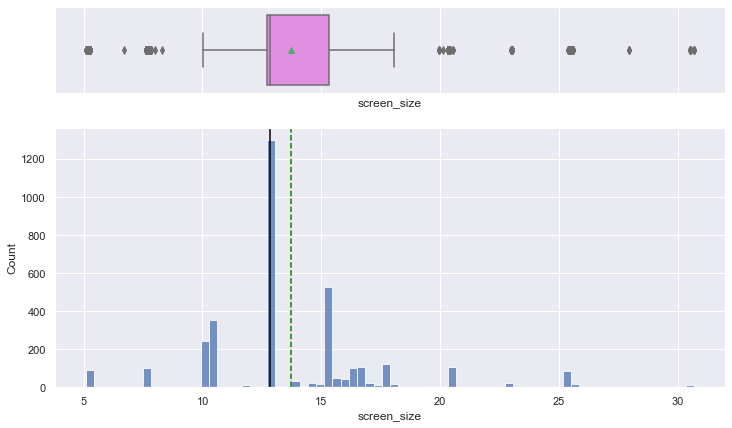

<IPython.core.display.Javascript object>

In [20]:
# screen_size
histogram_boxplot(df, "screen_size")

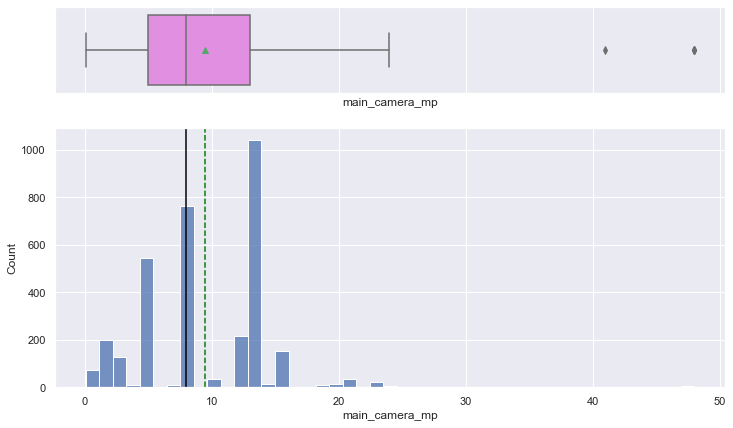

<IPython.core.display.Javascript object>

In [21]:
# main_camera_mp
histogram_boxplot(df, "main_camera_mp")

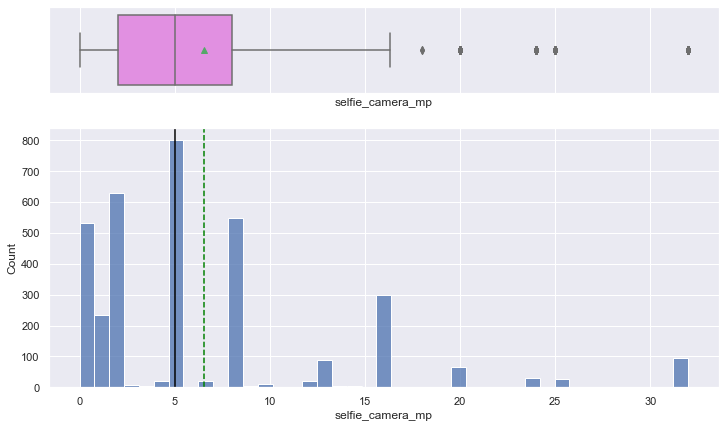

<IPython.core.display.Javascript object>

In [22]:
#selfie_camera_mp
histogram_boxplot(df, "selfie_camera_mp")

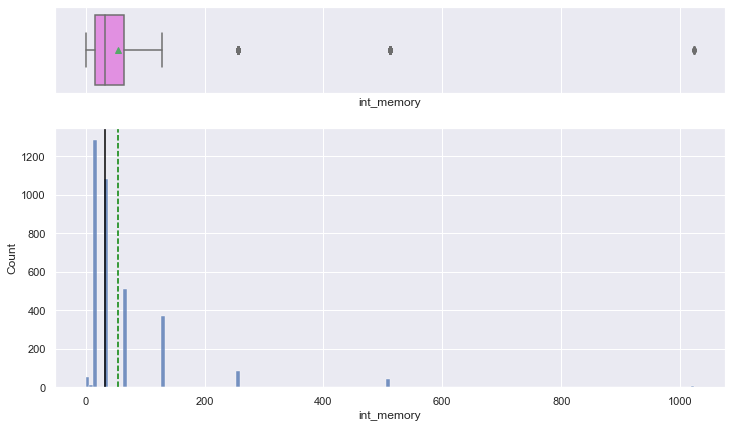

<IPython.core.display.Javascript object>

In [23]:
# int_memory
histogram_boxplot(df, "int_memory")

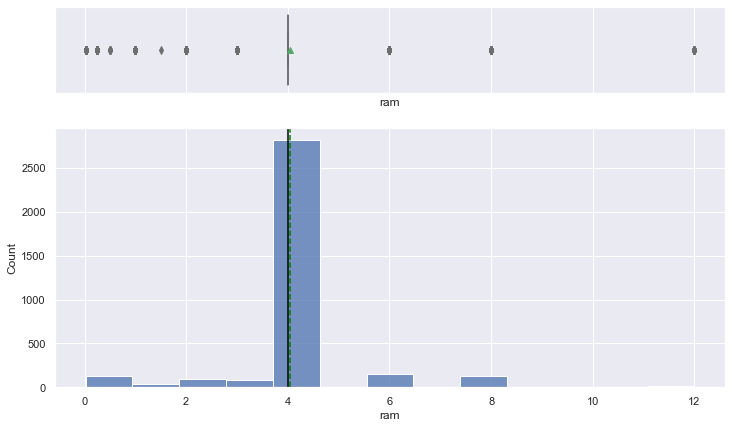

<IPython.core.display.Javascript object>

In [25]:
# ram
histogram_boxplot(df, "ram")

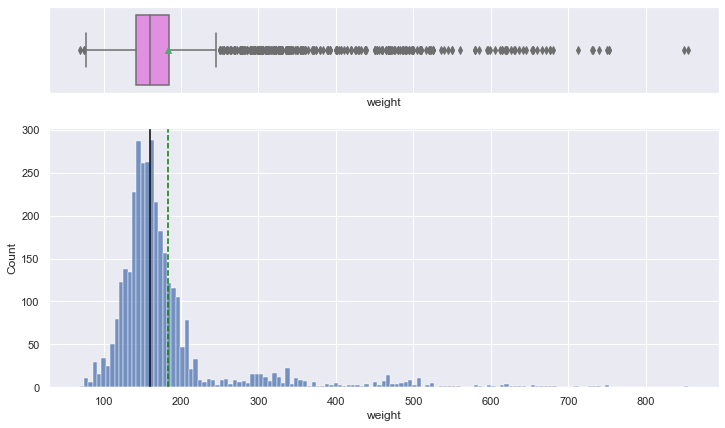

<IPython.core.display.Javascript object>

In [26]:
# weight
histogram_boxplot(df, "weight")

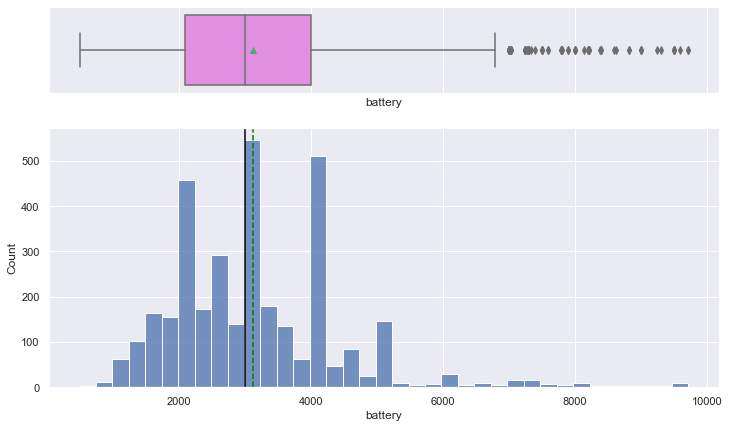

<IPython.core.display.Javascript object>

In [27]:
# battery
histogram_boxplot(df, "battery")

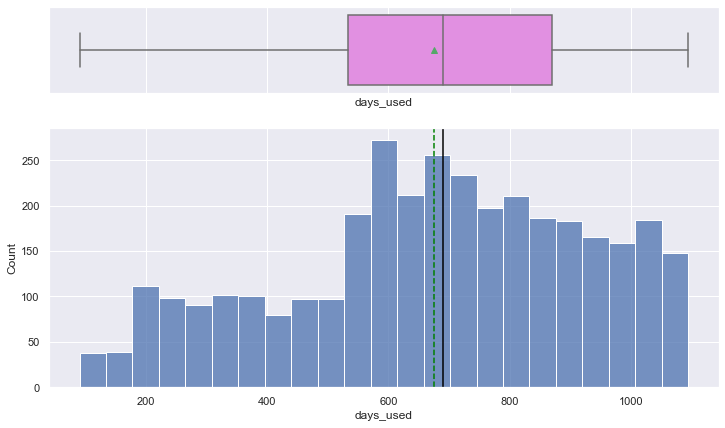

<IPython.core.display.Javascript object>

In [28]:
# days_used
histogram_boxplot(df, "days_used")

In [29]:
# function to create labeled barplots
# we used this plot for our categorical variables, instead of histogram_boxplot
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

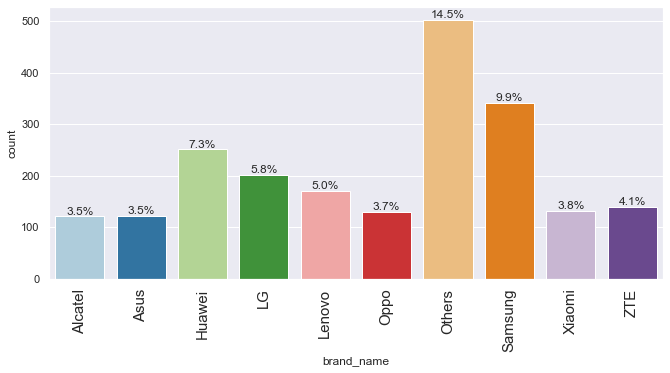

<IPython.core.display.Javascript object>

In [116]:
# brand_name
labeled_barplot(df, "brand_name", perc=True, n=10)

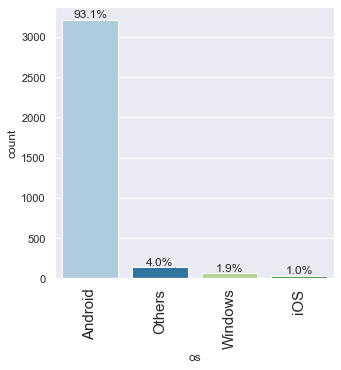

<IPython.core.display.Javascript object>

In [117]:
# os
labeled_barplot(df, "os", perc=True)

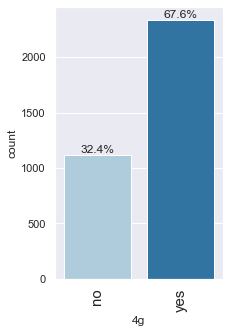

<IPython.core.display.Javascript object>

In [118]:
# 4g
labeled_barplot(df, "4g", perc=True)

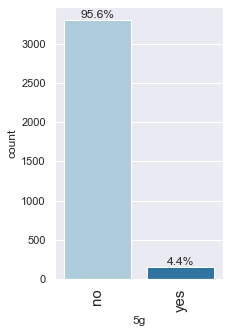

<IPython.core.display.Javascript object>

In [119]:
# 5g
labeled_barplot(df, "5g", perc=True)

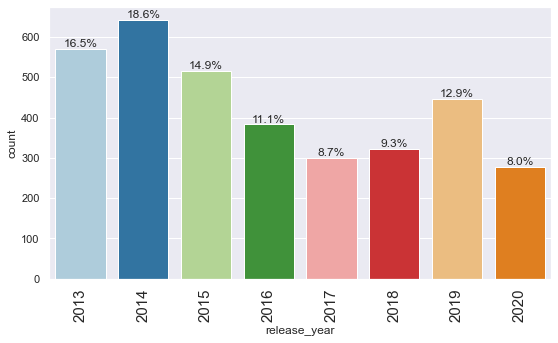

<IPython.core.display.Javascript object>

In [120]:
# release_year
labeled_barplot(df, "release_year", perc=True)

## Bivariate Analysis

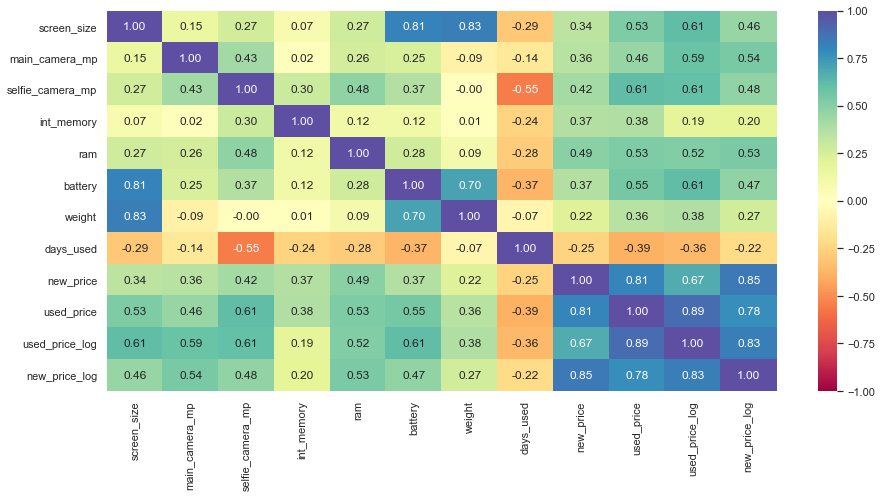

<IPython.core.display.Javascript object>

In [35]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

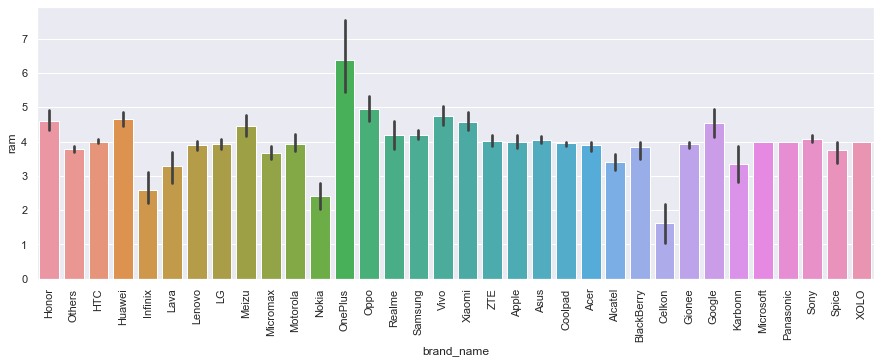

<IPython.core.display.Javascript object>

In [36]:
# checking ram vs brand_name
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [37]:
# creating new dataframe where battery > 4500
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 17)

<IPython.core.display.Javascript object>

In [38]:
# finding devices with large batteries and seeing which phones have lowest average weight
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

brand_name
Micromax     118.000000
Spice        158.000000
Panasonic    182.000000
Infinix      193.000000
Oppo         195.000000
ZTE          195.400000
Vivo         195.630769
Realme       196.833333
Motorola     200.757143
Gionee       209.430000
Xiaomi       231.500000
Honor        248.714286
Asus         313.772727
Nokia        318.000000
Acer         360.000000
LG           366.058333
Alcatel      380.000000
Others       390.546341
Huawei       394.486486
Samsung      398.352000
HTC          425.000000
Sony         439.500000
Apple        439.558824
Lenovo       442.721429
Google       517.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

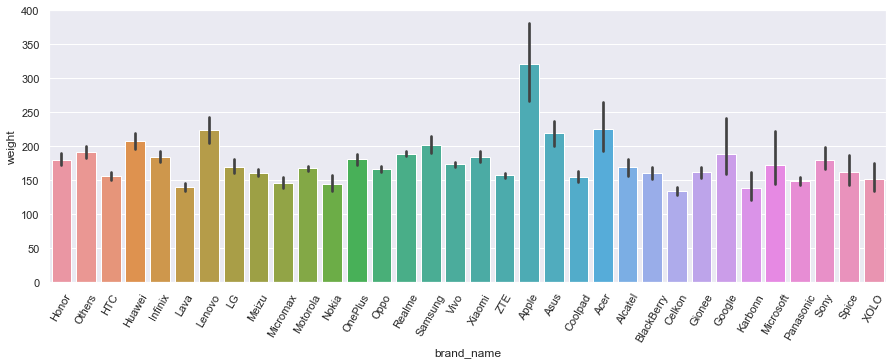

<IPython.core.display.Javascript object>

In [39]:
# brand_name vs weight
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=60)
plt.show()

In [40]:
# checking for large screen size while creating new dataframe
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 17)

<IPython.core.display.Javascript object>

In [41]:
# sorting large screens by brand_name
df_large_screen.brand_name.value_counts()

Huawei       149
Samsung      119
Others        99
Vivo          80
Honor         72
Oppo          70
Xiaomi        69
Lenovo        69
LG            59
Motorola      42
Asus          41
Realme        40
Alcatel       26
Apple         24
Acer          19
Meizu         17
ZTE           17
OnePlus       16
Nokia         15
Sony          12
Infinix       10
Micromax       7
HTC            7
Google         4
Gionee         3
XOLO           3
Coolpad        3
Spice          2
Panasonic      2
Karbonn        2
Microsoft      1
Name: brand_name, dtype: int64

<IPython.core.display.Javascript object>

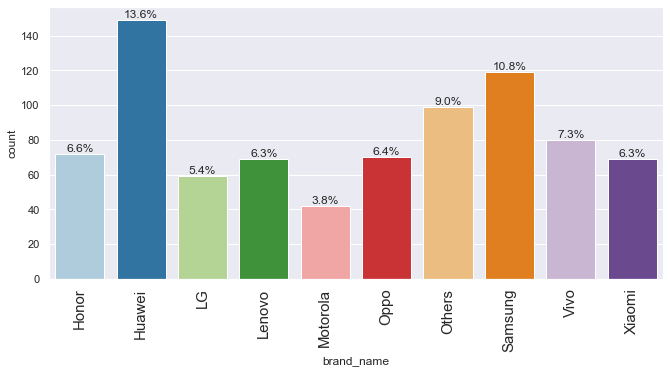

<IPython.core.display.Javascript object>

In [121]:
# barplot of large screen_size df
labeled_barplot(df_large_screen, "brand_name", perc=True, n=10)

# Data Preprocessing

## Feature Engineering


In [43]:
# creating new dataframe with three categories: budget, mid-ranger, premium
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["device_category"].value_counts()

Budget        1844
Mid-ranger    1025
Premium        585
Name: device_category, dtype: int64

<IPython.core.display.Javascript object>

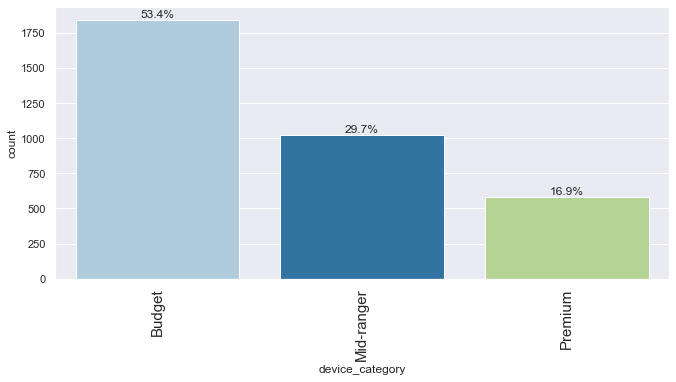

<IPython.core.display.Javascript object>

In [45]:
# barplot of dataframe of device_category
labeled_barplot(df, "device_category", perc=True, n=10)

In [46]:
# creating dataframe with selfie_camera_mp > 8
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 18)

<IPython.core.display.Javascript object>

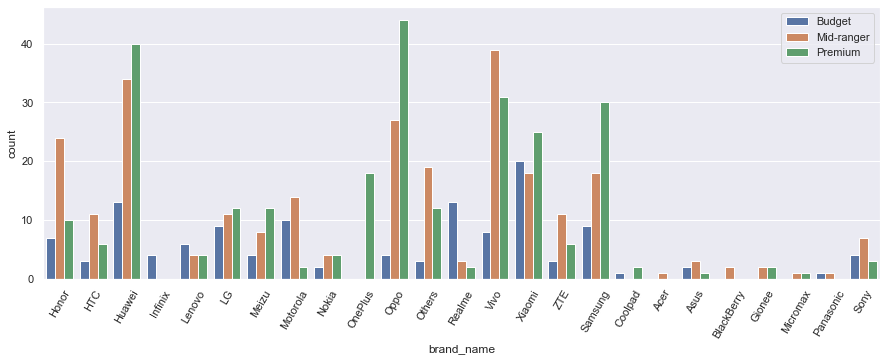

<IPython.core.display.Javascript object>

In [47]:
# barplot showing phone brands with device_category
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_selfie_camera, x="brand_name", hue="device_category"
)
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

In [48]:
# creating dataframe that shows main_camera_mp > 16
df_main_camera = df[
    df.main_camera_mp > 16
]
df_main_camera.shape

(94, 18)

<IPython.core.display.Javascript object>

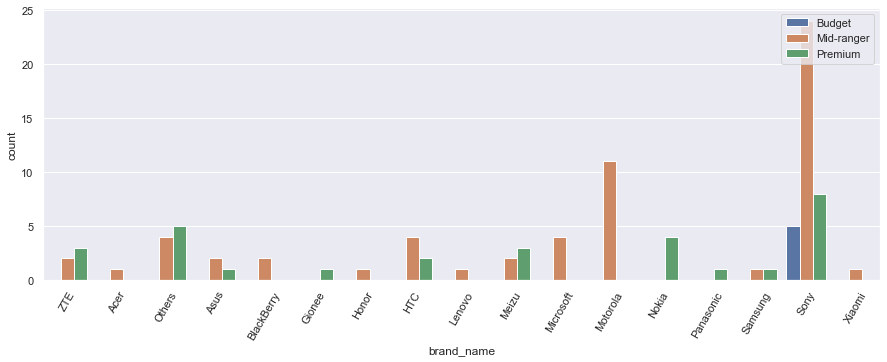

<IPython.core.display.Javascript object>

In [49]:
# barplot to view brands with main_camera dataframe by device_category
plt.figure(figsize=(15, 5))
sns.countplot(
    data=df_main_camera, x="brand_name", hue="device_category"
)
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

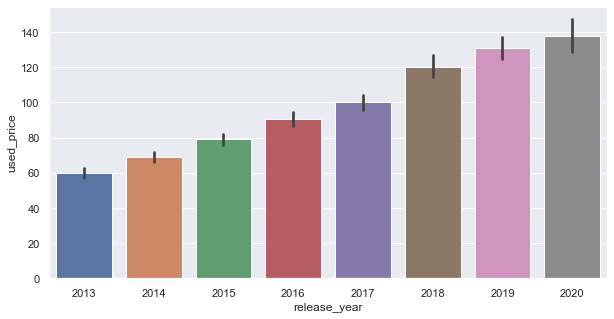

<IPython.core.display.Javascript object>

In [50]:
# barplot to view release_year vs used_price
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df, x="release_year", y="used_price"
)
plt.show()

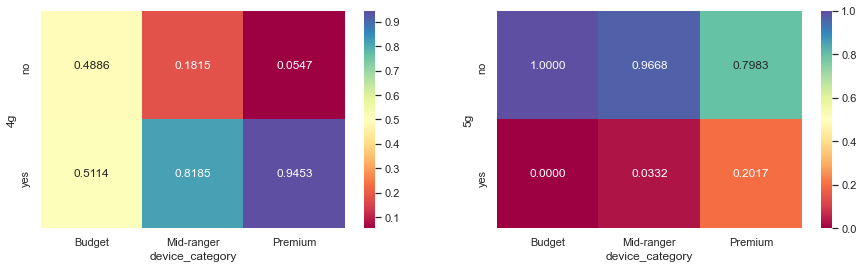

<IPython.core.display.Javascript object>

In [51]:
# viewing distribution of 4g vs 5g
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap(
    pd.crosstab(df["5g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.show()

## Missing Value Treatment

In [52]:
# let's create a copy of the data
df1 = df.copy()

<IPython.core.display.Javascript object>

In [53]:
# checking for missing values
df1.isnull().sum()  ## Complete the code to check missing values in all the columns

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
used_price_log        0
new_price_log         0
device_category       0
dtype: int64

<IPython.core.display.Javascript object>

In [57]:
df1["screen_size"].fillna(df1["screen_size"].median(), inplace=True)
df1["screen_size"].isnull().sum()

df1["main_camera_mp"].fillna(df1["main_camera_mp"].median(), inplace=True)
df1["main_camera_mp"].isnull().sum()

df1["selfie_camera_mp"].fillna(df1["selfie_camera_mp"].median(), inplace=True)
df1["selfie_camera_mp"].isnull().sum()

df1["int_memory"].fillna(df1["int_memory"].median(), inplace=True)
df1["int_memory"].isnull().sum()

df1["ram"].fillna(df1["ram"].median(), inplace=True)
df1["ram"].isnull().sum()

df1["battery"].fillna(df1["battery"].median(), inplace=True)
df1["battery"].isnull().sum()

df1["weight"].fillna(df1["weight"].median(), inplace=True)
df1["weight"].isnull().sum()

0

<IPython.core.display.Javascript object>

## Outlier Detection and Treatment

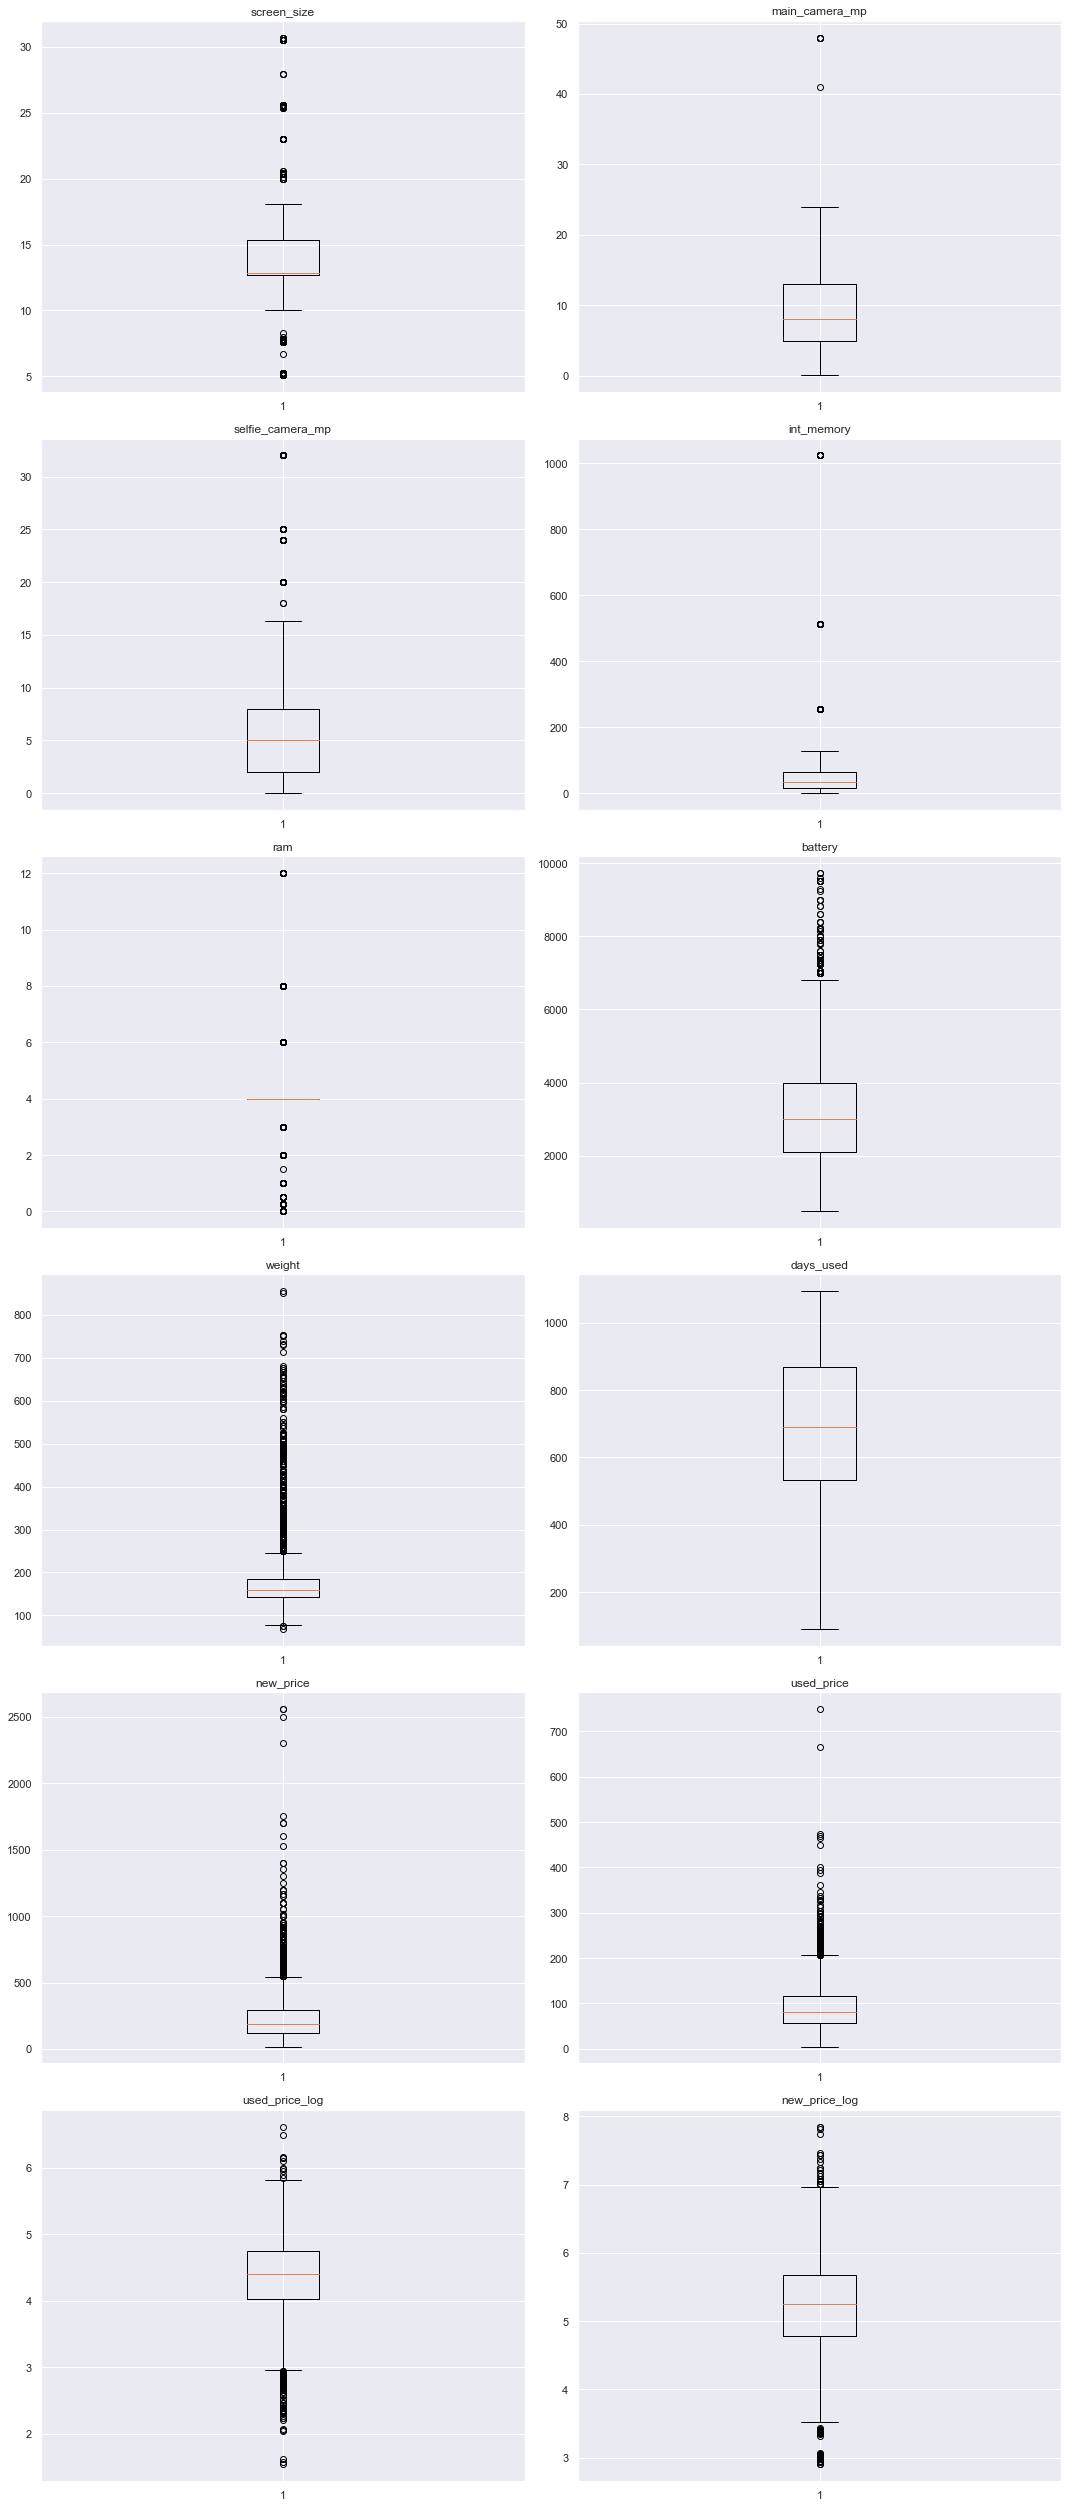

<IPython.core.display.Javascript object>

In [58]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(
        6, 2, i + 1
    )  # subplot(nrows, ncols, index, **kwargs)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

## Data Preparation for Modeling

In [59]:
# defining the dependent and independent variables
X = df1.drop(
    ["new_price", "used_price", "used_price_log", "device_category"], axis=1
)
y = df1["used_price_log"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  new_price_log  
0        127       4.715100  
1        325       5.519018  
2        162       5.884631  
3        345       5.630961  
4        293       4.947837  

0    4.

<IPython.core.display.Javascript object>

In [60]:
# adding the intercept to the data
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [61]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [62]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [63]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


<IPython.core.display.Javascript object>

# Building the Linear Regression Model

In [79]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     268.8
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:14:46   Log-Likelihood:                 124.22
No. Observations:                2417   AIC:                            -150.4
Df Residuals:                    2368   BIC:                             133.3
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -48.69

<IPython.core.display.Javascript object>

Let's check the model performance.

    We will check the model performance on the actual prices and not the log values.
    We will create a function that will convert the log prices to actual prices and then check the performance.
    We will be using metric functions defined in sklearn for RMSE and MAE.
    We will define a function to calculate MAPE.

# Model Performance Evaluation

In [83]:
# function to compute the adjusted R-Squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute r-Squared\
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-Squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    # computing the actual prices by using the exponential function
    # target = np.exp(target)
    # pred = np.exp(pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "R-Squared": r2,
            "Adj. R-Squared": adjr2,
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [84]:
# checking model performance on train set
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(
    olsmodel1, x_train, y_train
)
olsmodel1_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.844933,0.841723,0.229849,0.180336,4.326958


<IPython.core.display.Javascript object>

In [85]:
# checking model performance on test set
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(
    olsmodel1, x_test, y_test
)
olsmodel1_test_perf

Test Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.842547,0.834731,0.238306,0.184064,4.488006


<IPython.core.display.Javascript object>

# Checking Linear Regression Assumptions
For Linear Regression, we need to check if the following assumptions hold:
1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong multicollinearity

#### Checking Multicollinearity

In [86]:
# Checking the VIF of our predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    3.780344e+06
screen_size              7.680705e+00
main_camera_mp           2.136597e+00
selfie_camera_mp         2.808416e+00
int_memory               1.361465e+00
ram                      2.258272e+00
battery                  4.073582e+00
weight                   6.380746e+00
release_year             4.884645e+00
days_used                2.669393e+00
new_price_log            3.121941e+00
brand_name_Alcatel       3.405629e+00
brand_name_Apple         1.305691e+01
brand_name_Asus          3.330500e+00
brand_name_BlackBerry    1.632240e+00
brand_name_Celkon        1.773986e+00
brand_name_Coolpad       1.466522e+00
brand_name_Gionee        1.951248e+00
brand_name_Google        1.322242e+00
brand_name_HTC           3.409765e+00
brand_name_Honor         3.345910e+00
brand_name_Huawei        5.986382e+00
brand_name_Infinix       1.283540e+00
brand_name_Karbonn       1.573183e+00
brand_name_LG            4.848734e+00
brand_name_Lava          1.711294e+0

<IPython.core.display.Javascript object>

Because we have many predictors with VIF values over 5, it is safe to say we have some moderate multicollinearity. The features of screen_size, battery, weight and release_year seem to be candidates for dropping. Also, we can see some high VIF values for the brand_names so we will need to keep that in mind.

In [87]:
# dropping screen_size
x_train2 = x_train.drop(["screen_size"], axis=1)
olsmodel2 = sm.OLS(y_train, x_train2).fit()
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(
    olsmodel2, x_train2, y_train
)
olsmodel2_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.84159,0.838379,0.232313,0.181586,4.365055


<IPython.core.display.Javascript object>

Dropping screen_size, decreased the Adjusted R-Squared by .0033.

In [89]:
# dropping battery
x_train3 = x_train.drop(["battery"], axis=1)
olsmodel3 = sm.OLS(y_train, x_train3).fit()
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(
    olsmodel3, x_train3, y_train
)
olsmodel3_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.844622,0.841472,0.23008,0.180541,4.333898


<IPython.core.display.Javascript object>

Dropping battery, decreased the Adjusted R-Squared by .0003.

In [90]:
# dropping weight
x_train4 = x_train.drop(["weight"], axis=1)
olsmodel4 = sm.OLS(y_train, x_train4).fit()
print("Training Performance\n")
olsmodel4_train_perf = model_performance_regression(
    olsmodel4, x_train4, y_train
) 
olsmodel4_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.841327,0.838111,0.232506,0.182282,4.373299


<IPython.core.display.Javascript object>

Dropping weight, decreased the Adjusted R-Squared by .0036.

In [92]:
# dropping release_year
x_train5 = x_train.drop(["release_year"], axis=1)
olsmodel5 = sm.OLS(y_train, x_train5).fit()
print("Training Performance\n")
olsmodel5_train_perf = model_performance_regression(olsmodel5, x_train5, y_train)
olsmodel5_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.842995,0.839812,0.231281,0.18161,4.360811


<IPython.core.display.Javascript object>

Dropping release_year, decreased the Adjusted R-Squared by .0019.

Since none of the previous 4 features (screen_size, battery, weight, release_year) changed the Adjusted R-Squared value, we can safely assume that other features are bringing in sufficient information so that these aforementioned features can likely be dropped. We must drop one variable at a time.

In [ ]:
# removing screen_size from training set
x_train = x_train.drop(["screen_size"], axis=1)

In [103]:
# running regression again
# checking model performance on train set
olsmodel_10 = sm.OLS(y_train, x_train).fit()
print(olsmodel_10.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     267.8
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:43:28   Log-Likelihood:                 98.446
No. Observations:                2417   AIC:                            -100.9
Df Residuals:                    2369   BIC:                             177.0
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -60.69

<IPython.core.display.Javascript object>

In [104]:
# dropping battery
x_train_11 = x_train.drop(["battery"], axis=1)
olsmodel_11 = sm.OLS(y_train, x_train_11).fit()
print("Training Performance\n")
olsmodel_11_train_perf = model_performance_regression(olsmodel_11, x_train_11, y_train)
olsmodel_11_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.841576,0.838433,0.232324,0.181608,4.365824


<IPython.core.display.Javascript object>

Basically no change to Adjusted R-Squared.

In [105]:
# dropping weight
x_train_12 = x_train.drop(["weight"], axis=1)
olsmodel_12 = sm.OLS(y_train, x_train_12).fit()
print("Training Performance\n")
olsmodel_12_train_perf = model_performance_regression(olsmodel_12, x_train_12, y_train)
olsmodel_12_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.8192,0.815613,0.248189,0.193036,4.643717


<IPython.core.display.Javascript object>

Dropping weight, Adjusted R-Squared decreases by 2.2%. We won't drop this variable.

In [107]:
# dropping release_year
x_train_13 = x_train.drop(["release_year"], axis=1)
olsmodel_13 = sm.OLS(y_train, x_train_13).fit()
print("Training Performance\n")
olsmodel_13_train_perf = model_performance_regression(olsmodel_13, x_train_13, y_train)
olsmodel_13_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.838488,0.835284,0.234577,0.183727,4.421325


<IPython.core.display.Javascript object>

Basically no change to the Adusted R-Squared.

We will drop battery, then run our tests again.

In [108]:
# removing the battery feature from training set.
x_train = x_train.drop(["battery"], axis=1)

<IPython.core.display.Javascript object>

In [109]:
# running regression again
# checking model performance on train set
olsmodel_20 = sm.OLS(y_train, x_train).fit()
print(olsmodel_20.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     273.7
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:52:34   Log-Likelihood:                 98.337
No. Observations:                2417   AIC:                            -102.7
Df Residuals:                    2370   BIC:                             169.5
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -59.71

<IPython.core.display.Javascript object>

In [110]:
# dropping weight
x_train_21 = x_train.drop(["weight"], axis=1)
olsmodel_21 = sm.OLS(y_train, x_train_21).fit()
print("Training Performance\n")
olsmodel_21_train_perf = model_performance_regression(olsmodel_21, x_train_21, y_train)
olsmodel_21_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.794382,0.790391,0.264676,0.2052,4.921672


<IPython.core.display.Javascript object>

Dropping the weight feature results in a 4.5% decrease in Adjusted R-Squared, more proof we want to keep this variable.

In [111]:
# dropping release_year
x_train_22 = x_train.drop(["release_year"], axis=1)
olsmodel_22 = sm.OLS(y_train, x_train_22).fit()
print("Training Performance\n")
olsmodel_22_train_perf = model_performance_regression(olsmodel_22, x_train_22, y_train)
olsmodel_22_train_perf

Training Performance



,R-Squared,Adj. R-Squared,RMSE,MAE,MAPE
0,0.838401,0.835265,0.23464,0.183696,4.4202


<IPython.core.display.Javascript object>

Adjusted R-Squared basically no change.

We will drop release_year from training set.

In [112]:
# removing release_year from training set
x_train = x_train.drop(["release_year"], axis=1)

<IPython.core.display.Javascript object>

In [113]:
# running regression again
# checking model performance on train set
olsmodel_30 = sm.OLS(y_train, x_train).fit()
print(olsmodel_30.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     273.4
Date:                Thu, 03 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:58:29   Log-Likelihood:                 74.358
No. Observations:                2417   AIC:                            -56.72
Df Residuals:                    2371   BIC:                             209.6
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.45

<IPython.core.display.Javascript object>

Now that we have fixed our issues with mulitcollinearity, we can look at our p-values. There seem to be many p-values higher than .05 so we will drop them. Those variables will be most of our brand_names.

In [123]:
# removing variables with high p-values from training set
x_train = x_train.drop(
    [
        "brand_name_Alcatel",
        "brand_name_Apple",
        "brand_name_Asus",
        "brand_name_BlackBerry",
        "brand_name_Celkon",
        "brand_name_Coolpad",
        "brand_name_Gionee",
        "brand_name_Google",
        "brand_name_HTC",
        "brand_name_Honor",
        "brand_name_Huawei",
        "brand_name_Infinix",
        "brand_name_Karbonn",
        "brand_name_LG",
        "brand_name_Lava",
        "brand_name_Lenovo",
        "brand_name_Meizu",
        "brand_name_Micromax",
        "brand_name_Microsoft",
        "brand_name_Motorola",
        "brand_name_Nokia",
        "brand_name_OnePlus",
        "brand_name_Oppo",
        "brand_name_Others",
        "brand_name_Panasonic",
        "brand_name_Samsung",
        "brand_name_Sony",
        "brand_name_Spice",
        "brand_name_Vivo",
        "brand_name_XOLO",
        "brand_name_Xiaomi",
        "brand_name_ZTE",
        "os_Windows",
        "os_iOS",
        "5g_yes",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [124]:
# viewing columns in our x_train set
x_train.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram',
       'weight', 'days_used', 'new_price_log', 'brand_name_Realme',
       'os_Others', '4g_yes'],
      dtype='object')

<IPython.core.display.Javascript object>

In [126]:
# running the model again
olsmodel40 = sm.OLS(y_train, x_train).fit()
print(olsmodel40.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1205.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:16:12   Log-Likelihood:                 38.932
No. Observations:                2417   AIC:                            -55.86
Df Residuals:                    2406   BIC:                             7.829
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.5145      0.04

<IPython.core.display.Javascript object>

In [129]:
# actual vs fitted
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmodel40.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmodel40.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.087488,3.855374,0.232113
1,4.448399,4.617313,-0.168913
2,4.315353,4.273553,0.041799
3,4.282068,4.267420,0.014648
4,4.456438,4.529100,-0.072662


<IPython.core.display.Javascript object>

#### Checking Linearity and Independence

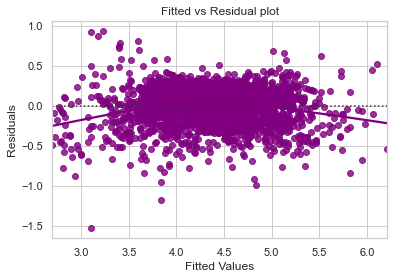

<IPython.core.display.Javascript object>

In [130]:
# plotting the fitted vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

DAta does not seem to be linear so will not create a new variable for the model.

#### Test for Normality

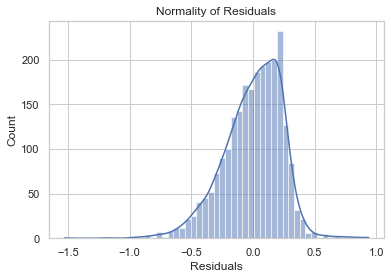

<IPython.core.display.Javascript object>

In [133]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of Residuals")
plt.show()

This graph is fairly normal, although there is some slight skewness to the left, we can live with this since it is only slightly.

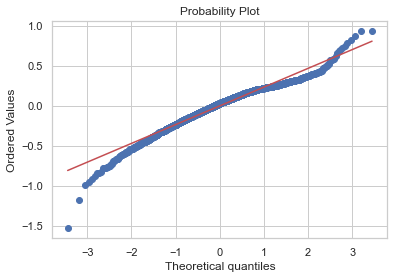

<IPython.core.display.Javascript object>

In [136]:
# QQ plot
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Most values lie on the line so we can accept these residuals.

In [137]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9687612056732178, pvalue=1.6264836380220138e-22)

<IPython.core.display.Javascript object>

We will accept our residuals based on QQ Plot and histogram, although strictly speaking our test for normality failed according wot Shapiro Wilkes test.

#### Test for Homoscedasticity

In [141]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

<IPython.core.display.Javascript object>

In [143]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', 1.0352311164824008), ('p-value', 0.27459916814298013)]

<IPython.core.display.Javascript object>

In [144]:
olsmodel40.params

const                1.514468
main_camera_mp       0.022101
selfie_camera_mp     0.017650
int_memory           0.000116
ram                  0.021305
weight               0.001732
days_used           -0.000115
new_price_log        0.408305
brand_name_Realme    0.122845
os_Others           -0.146604
4g_yes               0.097154
dtype: float64

<IPython.core.display.Javascript object>

In [146]:
x_train.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram',
       'weight', 'days_used', 'new_price_log', 'brand_name_Realme',
       'os_Others', '4g_yes'],
      dtype='object')

<IPython.core.display.Javascript object>

In [147]:
x_test.columns

Index(['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
       'new_price_log', 'brand_name_Alcatel', 'brand_name_Apple',
       'brand_name_Asus', 'brand_name_BlackBerry', 'brand_name_Celkon',
       'brand_name_Coolpad', 'brand_name_Gionee', 'brand_name_Google',
       'brand_name_HTC', 'brand_name_Honor', 'brand_name_Huawei',
       'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_LG',
       'brand_name_Lava', 'brand_name_Lenovo', 'brand_name_Meizu',
       'brand_name_Micromax', 'brand_name_Microsoft', 'brand_name_Motorola',
       'brand_name_Nokia', 'brand_name_OnePlus', 'brand_name_Oppo',
       'brand_name_Others', 'brand_name_Panasonic', 'brand_name_Realme',
       'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Spice',
       'brand_name_Vivo', 'brand_name_XOLO', 'brand_name_Xiaomi',
       'brand_name_ZTE', 'os_Others', 'os_Windows', 'os_iOS', '4g_yes',
       '5g_yes'],
 

<IPython.core.display.Javascript object>

In [151]:
x_test2 = x_test.drop(
    [
        "brand_name_Alcatel",
        "brand_name_Apple",
        "brand_name_Asus",
        "brand_name_BlackBerry",
        "brand_name_Celkon",
        "brand_name_Coolpad",
        "brand_name_Gionee",
        "brand_name_Google",
        "brand_name_HTC",
        "brand_name_Honor",
        "brand_name_Huawei",
        "brand_name_Infinix",
        "brand_name_Karbonn",
        "brand_name_LG",
        "brand_name_Lava",
        "brand_name_Lenovo",
        "brand_name_Meizu",
        "brand_name_Micromax",
        "brand_name_Microsoft",
        "brand_name_Motorola",
        "brand_name_Nokia",
        "brand_name_OnePlus",
        "brand_name_Oppo",
        "brand_name_Others",
        "brand_name_Panasonic",
        "brand_name_Samsung",
        "brand_name_Sony",
        "brand_name_Spice",
        "brand_name_Vivo",
        "brand_name_XOLO",
        "brand_name_Xiaomi",
        "brand_name_ZTE",
        "os_Windows",
        "os_iOS",
        "5g_yes",
        "screen_size",
        "battery",
        "release_year",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [153]:
x_test2.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram',
       'weight', 'days_used', 'new_price_log', 'brand_name_Realme',
       'os_Others', '4g_yes'],
      dtype='object')

<IPython.core.display.Javascript object>

In [154]:
x_train.columns

Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram',
       'weight', 'days_used', 'new_price_log', 'brand_name_Realme',
       'os_Others', '4g_yes'],
      dtype='object')

<IPython.core.display.Javascript object>

In [155]:
y_pred = olsmodel40.predict(x_test2)

<IPython.core.display.Javascript object>

In [156]:
#rmse on train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.23810435790376083

<IPython.core.display.Javascript object>

In [157]:
# rmse on test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.24504191259715813

<IPython.core.display.Javascript object>

In [158]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.188340610349736

<IPython.core.display.Javascript object>

RMSE on the train and test data are close so no overfitting.

MAE shows that our model the used price within a mean error of .18 units on the test data.

olsmodel40 is a good model to make predictions on.